In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


C:\Users\parth\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Loading the datase
airbnb_data = pd.read_csv("D:\Projects\Ml\AB_NYC_2019.csv\AB_NYC_2019.csv")

# stats and stucture of the dataset
print(airbnb_data.head())
print(airbnb_data.describe())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

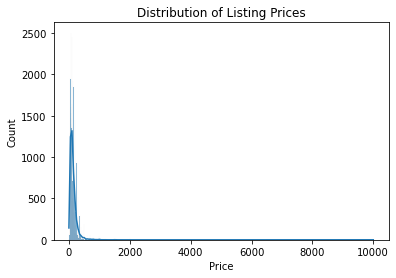

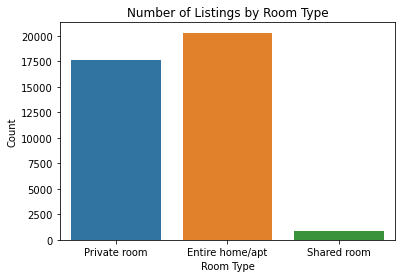

In [5]:
# Handling the missing values
airbnb_data.dropna(inplace=True)

# For Data visualization(plotiing the graphs)
sns.histplot(airbnb_data['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Listing Prices')
plt.show()

sns.countplot(x='room_type', data=airbnb_data)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Number of Listings by Room Type')
plt.show()


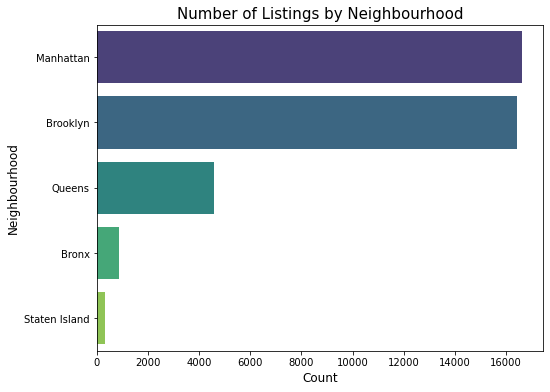

In [14]:
airbnb_data.rename(columns={'neighbourhood_group':'boroname'}, inplace=True)
borough_count = airbnb_data.groupby('boroname').agg('count').reset_index()

# Sort the data by count in descending order
borough_count.sort_values('id', ascending=False, inplace=True)

# Plot the radical column chart
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x='id', y='boroname', data=borough_count, ax=ax1, palette='viridis')

ax1.set_title('Number of Listings by Neighbourhood', fontsize=15)
ax1.set_xlabel('Count', fontsize=12)
ax1.set_ylabel('Neighbourhood', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

plt.show()


C:\Users\parth\AppData\Local\Temp\ipykernel_6616\3494373400.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  nyc = gpd.read_file(gpd.datasets.get_path('nybb'))


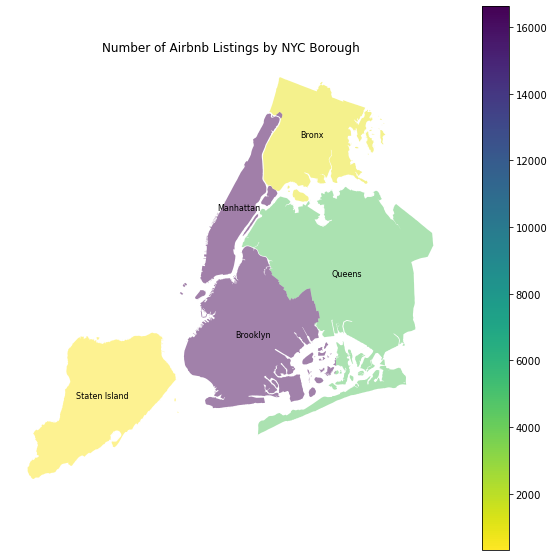

In [9]:
import geopandas as gpd
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)
bc_geo = nyc.merge(borough_count, on='boroname')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bc_geo.plot(column='id', cmap='viridis_r', alpha=0.5, ax=ax, legend=True)

# Add borough names as annotations
bc_geo.apply(lambda x: ax.annotate(
    text=x.boroname,  # Use 'text' instead of 's'
    color='black',
    xy=x.geometry.centroid.coords[0],
    ha='center',
    fontsize=8),  # Optional: Adjust the fontsize for better visibility
    axis=1)

plt.title("Number of Airbnb Listings by NYC Borough")
plt.axis('off')
plt.show()
